# Domestic Declararion

In [1]:
!pip3 install pm4py==2.2.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=42f7168707b81dec2edeb6de6bfa42874e12971e536385c97e51c48f0b9e74a8
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24940 sha256=6057eb5afdecb91347f3c42751fa1214416d38503299131d5b82c9d66a1a8657
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c17

In [2]:
import pandas as pd
import numpy as np


In [3]:
import pm4py
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto

In [5]:
from pm4py.objects.log.importer.xes import importer as xes_importer
domestic_declarations_log = xes_importer.apply('/content/DomesticDeclarations.xes_')
international_declarations_log = xes_importer.apply('/content/InternationalDeclarations.xes_')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [6]:
print(len(domestic_declarations_log))
print(len(international_declarations_log))

10500
6449


In [8]:
from pm4py.algo.filtering.log.variants import variants_filter
variant_dom_decl = variants_filter.get_variants(domestic_declarations_log)

In [9]:
variant_dom_decl

{'Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled': [{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]},
  {'attributes': {'id': 'declaration 86731', 'concept:name': 'declaration 86731', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86732', 'Amount': 113.86

In [10]:

from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(domestic_declarations_log)

In [11]:
variants_count

[{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 4618},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 2473},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 1392},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by PRE_APPROVER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 575},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 345},


In [12]:
len(variants_count)

99

In [14]:
'REJECTED by ADMINISTRATION' in variant_example

True

In [15]:
for variant in variants_count:
  print(variant)

{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled', 'count': 4618}
{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled', 'count': 2473}
{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled', 'count': 1392}
{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by PRE_APPROVER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled', 'count': 575}
{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled', 'count': 345}
{'variant': 'Declara

In [16]:
rejected = 0
for variant in variants_count:
  if "REJECTED" in variant['variant']:
      rejected += variant['count']
print(rejected)

1301


In [17]:
supervisor_approved = 0
for variant in variants_count:
  if 'Declaration FINAL_APPROVED by SUPERVISOR' in variant['variant']:
      supervisor_approved += variant['count']
print(supervisor_approved)


10070


In [18]:
case_handled = 0
for variant in variants_count:
    if "Payment Handled" in variant['variant']:
      case_handled += variant['count']
print(case_handled)

10044


In [19]:
not_approved = 0
for variant in variants_count:
  if "APPROVED" not in variant['variant']:
      not_approved += variant['count']
print(not_approved)

365


In [20]:
double_payed = 0
for variant in variants_count:
  if variant['variant'].count('Payment Handled') > 1:
      double_payed += variant['count']
print(double_payed)

0


In [21]:
resubmitted = 0
for variant in variants_count:
  if variant['variant'].count('SUBMITTED') > 1:
      resubmitted += variant['count'] * (variant['variant'].count('SUBMITTED') - 1)
print(resubmitted)

1166


In [22]:
domestic_declarations_variant_count_df = pd.DataFrame.from_dict(variants_count)

In [23]:
domestic_declarations_variant_count_df

variant  count
0   Declaration SUBMITTED by EMPLOYEE,Declaration ...   4618
1   Declaration SUBMITTED by EMPLOYEE,Declaration ...   2473
2   Declaration SUBMITTED by EMPLOYEE,Declaration ...   1392
3   Declaration SUBMITTED by EMPLOYEE,Declaration ...    575
4   Declaration SUBMITTED by EMPLOYEE,Declaration ...    345
..                                                ...    ...
94  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
95  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
96  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
97  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
98  Declaration SAVED by EMPLOYEE,Request Payment,...      1

[99 rows x 2 columns]

In [24]:
len(domestic_declarations_variant_count_df[domestic_declarations_variant_count_df['count'] <= 3])

63

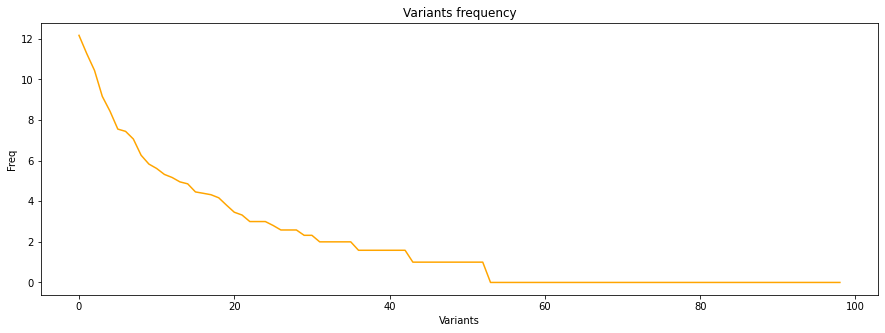

In [25]:
variant = domestic_declarations_variant_count_df.index
frequency = domestic_declarations_variant_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [26]:
len(domestic_declarations_log)

10500

In [27]:
domestic_declarations_log[0]

{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]}

In [28]:
domestic_declarations_log[0][0]

{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}

In [29]:
len(domestic_declarations_log)

10500

In [30]:
pm4py.get_start_activities(domestic_declarations_log)


{'Declaration SUBMITTED by EMPLOYEE': 10365,
 'Declaration SAVED by EMPLOYEE': 135}

In [31]:
pm4py.get_start_activities(international_declarations_log)


{'Start trip': 740,
 'Declaration SUBMITTED by EMPLOYEE': 407,
 'Permit SUBMITTED by EMPLOYEE': 5294,
 'Declaration SAVED by EMPLOYEE': 8}

In [32]:
domestic_declarations_log

[{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]}, '....', {'attributes': {'id': 'declaration 138359', 'concept:name': 'declaration 138359', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 138360', 'Amount': 190.40457573396148}, 'events': [{'id': 'st_step 138363_0', 'org:resource': 'STAFF MEMBER', 'concept:name': '

In [33]:
type(domestic_declarations_log)

pm4py.objects.log.obj.EventLog

In [34]:
len(domestic_declarations_log)

10500

In [35]:
from pm4py.objects.conversion.log import converter as log_converter

domestic_declarations_df = log_converter.apply(domestic_declarations_log, variant=log_converter.Variants.TO_DATA_FRAME)



In [36]:
domestic_declarations_df

id  org:resource  \
0               st_step 86794_0  STAFF MEMBER   
1               st_step 86793_0  STAFF MEMBER   
2       dd_declaration 86791_19        SYSTEM   
3       dd_declaration 86791_20        SYSTEM   
4               st_step 86798_0  STAFF MEMBER   
...                         ...           ...   
56432          st_step 138363_0  STAFF MEMBER   
56433          st_step 138361_0  STAFF MEMBER   
56434          st_step 138362_0  STAFF MEMBER   
56435  dd_declaration 138359_19        SYSTEM   
56436  dd_declaration 138359_20        SYSTEM   

                                   concept:name             time:timestamp  \
0             Declaration SUBMITTED by EMPLOYEE  2017-01-09 09:49:50+01:00   
1      Declaration FINAL_APPROVED by SUPERVISOR  2017-01-09 11:27:48+01:00   
2                               Request Payment  2017-01-10 09:34:44+01:00   
3                               Payment Handled  2017-01-12 17:31:22+01:00   
4             Declaration SUBMITTED by EMPLOYEE  2017-01-09 10:26:14+01:00   
...                                         ...                        ...   
56432         Declaration SUBMITTED by EMPLOYEE  2018-12-29 17:50:14+01:00   
56433    Declaration APPROVED by ADMINISTRATION  2018-12-29 17:56:13+01:00   
56434  Declaration FINAL_APPROVED by SUPERVISOR  2019-01-03 08:55:52+01:00   
56435                           Request Payment  2019-01-08 08:20:28+01:00   
56436                           Payment Handled  2019-01-10 17:31:08+01:00   

             org:role             case:id   case:concept:name  \
0            EMPLOYEE   declaration 86791   declaration 86791   
1          SUPERVISOR   declaration 86791   declaration 86791   
2           UNDEFINED   declaration 86791   declaration 86791   
3           UNDEFINED   declaration 86791   declaration 86791   
4            EMPLOYEE   declaration 86795   declaration 86795   
...               ...                 ...                 ...   
56432        EMPLOYEE  declaration 138359  declaration 138359   
56433  ADMINISTRATION  declaration 138359  declaration 138359   
56434      SUPERVISOR  declaration 138359  declaration 138359   
56435       UNDEFINED  declaration 138359  declaration 138359   
56436       UNDEFINED  declaration 138359  declaration 138359   

      case:BudgetNumber     case:DeclarationNumber  case:Amount  
0          budget 86566   declaration number 86792    26.851205  
1          budget 86566   declaration number 86792    26.851205  
2          budget 86566   declaration number 86792    26.851205  
3          budget 86566   declaration number 86792    26.851205  
4          budget 86566   declaration number 86796   182.464172  
...                 ...                        ...          ...  
56432      budget 86566  declaration number 138360   190.404576  
56433      budget 86566  declaration number 138360   190.404576  
56434      budget 86566  declaration number 138360   190.404576  
56435      budget 86566  declaration number 138360   190.404576  
56436      budget 86566  declaration number 138360   190.404576  

[56437 rows x 10 columns]

In [37]:
profile = domestic_declarations_df.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ','.join(x) ),\
Resource = ('org:resource', 'nunique'),\
Duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)

In [38]:
profile

Activity  \
case:concept:name              
declaration 100000         5   
declaration 100005         5   
declaration 100010         5   
declaration 100015         6   
declaration 100021         6   
...                      ...   
declaration 99973          5   
declaration 99978          5   
declaration 99983          6   
declaration 99989          6   
declaration 99995          5   

                                                        Activity_list  \
case:concept:name                                                       
declaration 100000  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100005  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100010  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100015  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100021  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
...                                                               ...   
declaration 99973   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99978   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99983   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99989   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99995   Declaration SUBMITTED by EMPLOYEE,Declaration ...   

                    Resource         Duration  
case:concept:name                              
declaration 100000         2 13 days 08:11:13  
declaration 100005         2  2 days 07:52:23  
declaration 100010         2  2 days 07:47:56  
declaration 100015         2  6 days 04:24:19  
declaration 100021         2 12 days 06:25:25  
...                      ...              ...  
declaration 99973          2  7 days 05:47:02  
declaration 99978          2  7 days 04:59:03  
declaration 99983          2 10 days 04:47:18  
declaration 99989          2  6 days 21:55:27  
declaration 99995          2  2 days 20:32:19  

[10500 rows x 4 columns]

In [39]:

activities = pm4py.get_event_attribute_values(domestic_declarations_log,"concept:name")
activities


{'Declaration SUBMITTED by EMPLOYEE': 11531,
 'Declaration FINAL_APPROVED by SUPERVISOR': 10131,
 'Request Payment': 10040,
 'Payment Handled': 10044,
 'Declaration APPROVED by PRE_APPROVER': 685,
 'Declaration REJECTED by MISSING': 91,
 'Declaration REJECTED by PRE_APPROVER': 86,
 'Declaration REJECTED by EMPLOYEE': 1365,
 'Declaration SAVED by EMPLOYEE': 135,
 'Declaration REJECTED by SUPERVISOR': 293,
 'Declaration APPROVED by ADMINISTRATION': 8202,
 'Declaration APPROVED by BUDGET OWNER': 2820,
 'Declaration FOR_APPROVAL by SUPERVISOR': 1,
 'Declaration REJECTED by ADMINISTRATION': 952,
 'Declaration FOR_APPROVAL by PRE_APPROVER': 1,
 'Declaration REJECTED by BUDGET OWNER': 59,
 'Declaration FOR_APPROVAL by ADMINISTRATION': 1}

In [40]:
len(domestic_declarations_log)

10500

In [41]:
domestic_declarations_log_f = pm4py.filter_start_activities(domestic_declarations_log, {'Declaration SUBMITTED by EMPLOYEE'})
len(domestic_declarations_log_f)

10365

In [ ]:
domestic_declarations_variant_count_df

variant  count
0   Declaration SUBMITTED by EMPLOYEE,Declaration ...   4618
1   Declaration SUBMITTED by EMPLOYEE,Declaration ...   2473
2   Declaration SUBMITTED by EMPLOYEE,Declaration ...   1392
3   Declaration SUBMITTED by EMPLOYEE,Declaration ...    575
4   Declaration SUBMITTED by EMPLOYEE,Declaration ...    345
..                                                ...    ...
94  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
95  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
96  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
97  Declaration SUBMITTED by EMPLOYEE,Declaration ...      1
98  Declaration SAVED by EMPLOYEE,Request Payment,...      1

[99 rows x 2 columns]

In [42]:
k = 6
domestic_declarations_log_f = pm4py.filter_variants_top_k(domestic_declarations_log_f, k)

In [43]:
len(domestic_declarations_log_f)

9591

In [44]:
activities

{'Declaration SUBMITTED by EMPLOYEE': 11531,
 'Declaration FINAL_APPROVED by SUPERVISOR': 10131,
 'Request Payment': 10040,
 'Payment Handled': 10044,
 'Declaration APPROVED by PRE_APPROVER': 685,
 'Declaration REJECTED by MISSING': 91,
 'Declaration REJECTED by PRE_APPROVER': 86,
 'Declaration REJECTED by EMPLOYEE': 1365,
 'Declaration SAVED by EMPLOYEE': 135,
 'Declaration REJECTED by SUPERVISOR': 293,
 'Declaration APPROVED by ADMINISTRATION': 8202,
 'Declaration APPROVED by BUDGET OWNER': 2820,
 'Declaration FOR_APPROVAL by SUPERVISOR': 1,
 'Declaration REJECTED by ADMINISTRATION': 952,
 'Declaration FOR_APPROVAL by PRE_APPROVER': 1,
 'Declaration REJECTED by BUDGET OWNER': 59,
 'Declaration FOR_APPROVAL by ADMINISTRATION': 1}

In [45]:
table_view  = pd.DataFrame.from_dict(activities.items())
table_view

0      1
0            Declaration SUBMITTED by EMPLOYEE  11531
1     Declaration FINAL_APPROVED by SUPERVISOR  10131
2                              Request Payment  10040
3                              Payment Handled  10044
4         Declaration APPROVED by PRE_APPROVER    685
5              Declaration REJECTED by MISSING     91
6         Declaration REJECTED by PRE_APPROVER     86
7             Declaration REJECTED by EMPLOYEE   1365
8                Declaration SAVED by EMPLOYEE    135
9           Declaration REJECTED by SUPERVISOR    293
10      Declaration APPROVED by ADMINISTRATION   8202
11        Declaration APPROVED by BUDGET OWNER   2820
12      Declaration FOR_APPROVAL by SUPERVISOR      1
13      Declaration REJECTED by ADMINISTRATION    952
14    Declaration FOR_APPROVAL by PRE_APPROVER      1
15        Declaration REJECTED by BUDGET OWNER     59
16  Declaration FOR_APPROVAL by ADMINISTRATION      1

In [46]:
profile

Activity  \
case:concept:name              
declaration 100000         5   
declaration 100005         5   
declaration 100010         5   
declaration 100015         6   
declaration 100021         6   
...                      ...   
declaration 99973          5   
declaration 99978          5   
declaration 99983          6   
declaration 99989          6   
declaration 99995          5   

                                                        Activity_list  \
case:concept:name                                                       
declaration 100000  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100005  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100010  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100015  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 100021  Declaration SUBMITTED by EMPLOYEE,Declaration ...   
...                                                               ...   
declaration 99973   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99978   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99983   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99989   Declaration SUBMITTED by EMPLOYEE,Declaration ...   
declaration 99995   Declaration SUBMITTED by EMPLOYEE,Declaration ...   

                    Resource         Duration  
case:concept:name                              
declaration 100000         2 13 days 08:11:13  
declaration 100005         2  2 days 07:52:23  
declaration 100010         2  2 days 07:47:56  
declaration 100015         2  6 days 04:24:19  
declaration 100021         2 12 days 06:25:25  
...                      ...              ...  
declaration 99973          2  7 days 05:47:02  
declaration 99978          2  7 days 04:59:03  
declaration 99983          2 10 days 04:47:18  
declaration 99989          2  6 days 21:55:27  
declaration 99995          2  2 days 20:32:19  

[10500 rows x 4 columns]

In [47]:
# on filters variant
from pm4py.algo.filtering.log.variants import variants_filter
variant_domestic_declarations_log_f = variants_filter.get_variants(domestic_declarations_log_f)

In [48]:
variant_domestic_declarations_log_f

{'Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled': [{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE', 'case:id': 'declaration 86791', 'case:concept:name': 'declaration 86791', 'case:BudgetNumber': 'budget 86566', 'case:DeclarationNumber': 'declaration number 86792', 'case:Amount': 26.85120450862128}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:rol

In [49]:

from pm4py.statistics.traces.generic.log import case_statistics
variants_count_f = case_statistics.get_variant_statistics(domestic_declarations_log_f)

In [50]:
variants_count_f

[{'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 4618},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 2473},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 1392},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by PRE_APPROVER,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 575},
 {'variant': 'Declaration SUBMITTED by EMPLOYEE,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
  'count': 345},


In [51]:
len(variants_count_f)

6

In [52]:
domestic_declarations_variant_count_df = pd.DataFrame.from_dict(variants_count_f)

In [53]:
domestic_declarations_variant_count_df

variant  count
0  Declaration SUBMITTED by EMPLOYEE,Declaration ...   4618
1  Declaration SUBMITTED by EMPLOYEE,Declaration ...   2473
2  Declaration SUBMITTED by EMPLOYEE,Declaration ...   1392
3  Declaration SUBMITTED by EMPLOYEE,Declaration ...    575
4  Declaration SUBMITTED by EMPLOYEE,Declaration ...    345
5  Declaration SUBMITTED by EMPLOYEE,Declaration ...    188

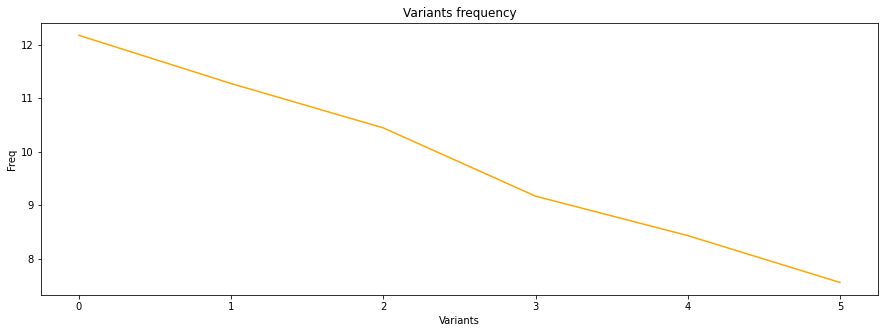

In [54]:
variant = domestic_declarations_variant_count_df.index
frequency = domestic_declarations_variant_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [55]:
variant_distr = []
for variant in variants_count:
  variant_distr.append(variant['count'])

In [56]:
import statistics

mean = statistics.mean(variant_distr)
median = statistics.median(variant_distr)


print('mean =', mean)
print('median =', median)


mean = 106.06060606060606
median = 2


In [ ]:
l = [1,2,3]
a, b, c = l

In [ ]:
a, b , c

(1, 2, 3)

In [78]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(domestic_declarations_log_f)

<ipython-input-79-56234b2ad13e>:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, parameters={alpha_miner.Variants.ALPHA_VERSION_CLASSIC.value.Parameters.START_TIMESTAMP_KEY:'0:0:0'}, log=domestic_declarations_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

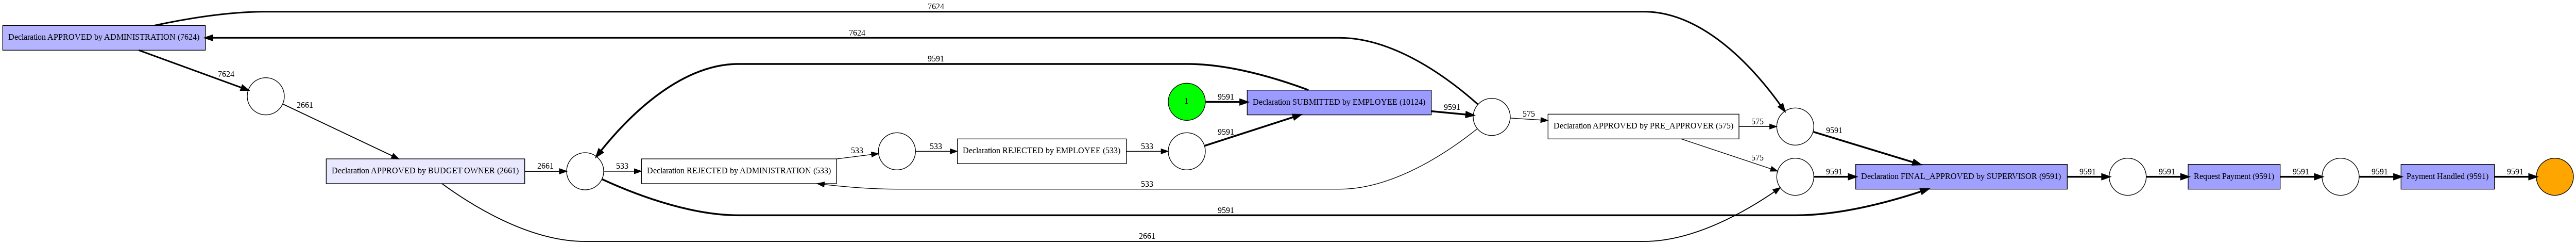

In [79]:

## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, parameters={alpha_miner.Variants.ALPHA_VERSION_CLASSIC.value.Parameters.START_TIMESTAMP_KEY:'0:0:0'}, log=domestic_declarations_log_f)
pn_visualizer.view(gviz)

In [80]:

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_alpha = replay_fitness_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)


from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec_alpha = precision_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen_alpha = generalization_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking)


from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp_alpha = simplicity_evaluator.apply(net)
print(fitness_alpha)
print(prec_alpha)
print(gen_alpha)
print(simp_alpha)


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/21 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8406248086415203, 'log_fitness': 0.8456127846535074, 'percentage_of_fitting_traces': 0.0}
1.0
0.9778064114712214
0.625


In [82]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
tree = inductive_miner.apply_tree(domestic_declarations_log_f)

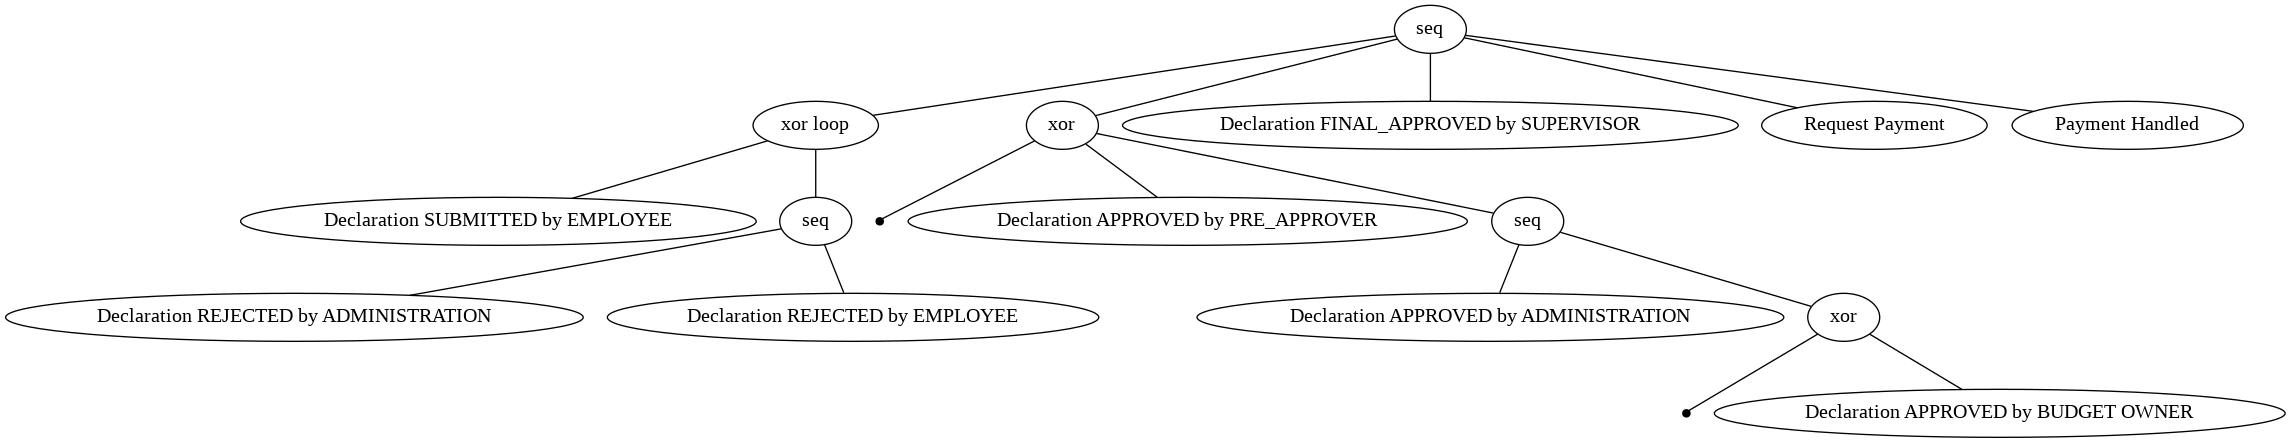

In [83]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

<ipython-input-84-2b75373ccd67>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=domestic_declarations_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

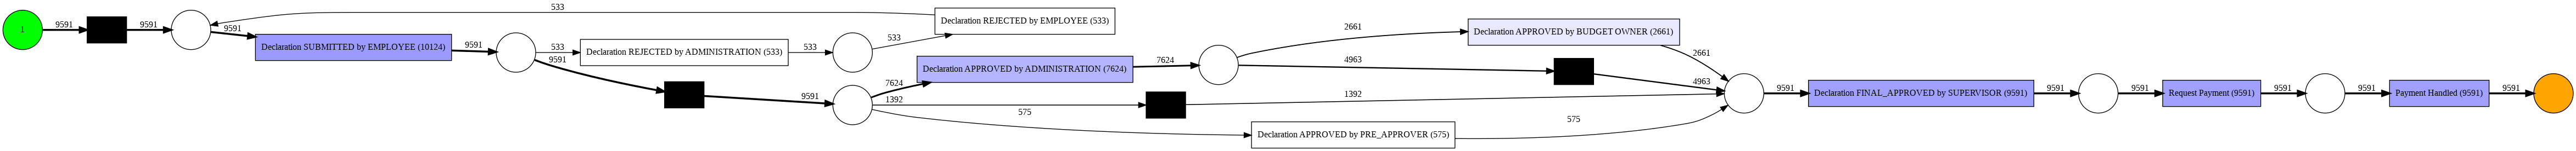

In [84]:
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=domestic_declarations_log_f)
pn_visualizer.view(gviz)

In [85]:

fitness_inductive = replay_fitness_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec_inductive = precision_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
gen_inductive = generalization_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking)
simp_inductive = simplicity_evaluator.apply(net)
print(fitness_inductive)
print(prec_inductive)
print(gen_inductive)
print(simp_inductive)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/21 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
0.9819970952161137
0.9799106266582878
0.7931034482758622


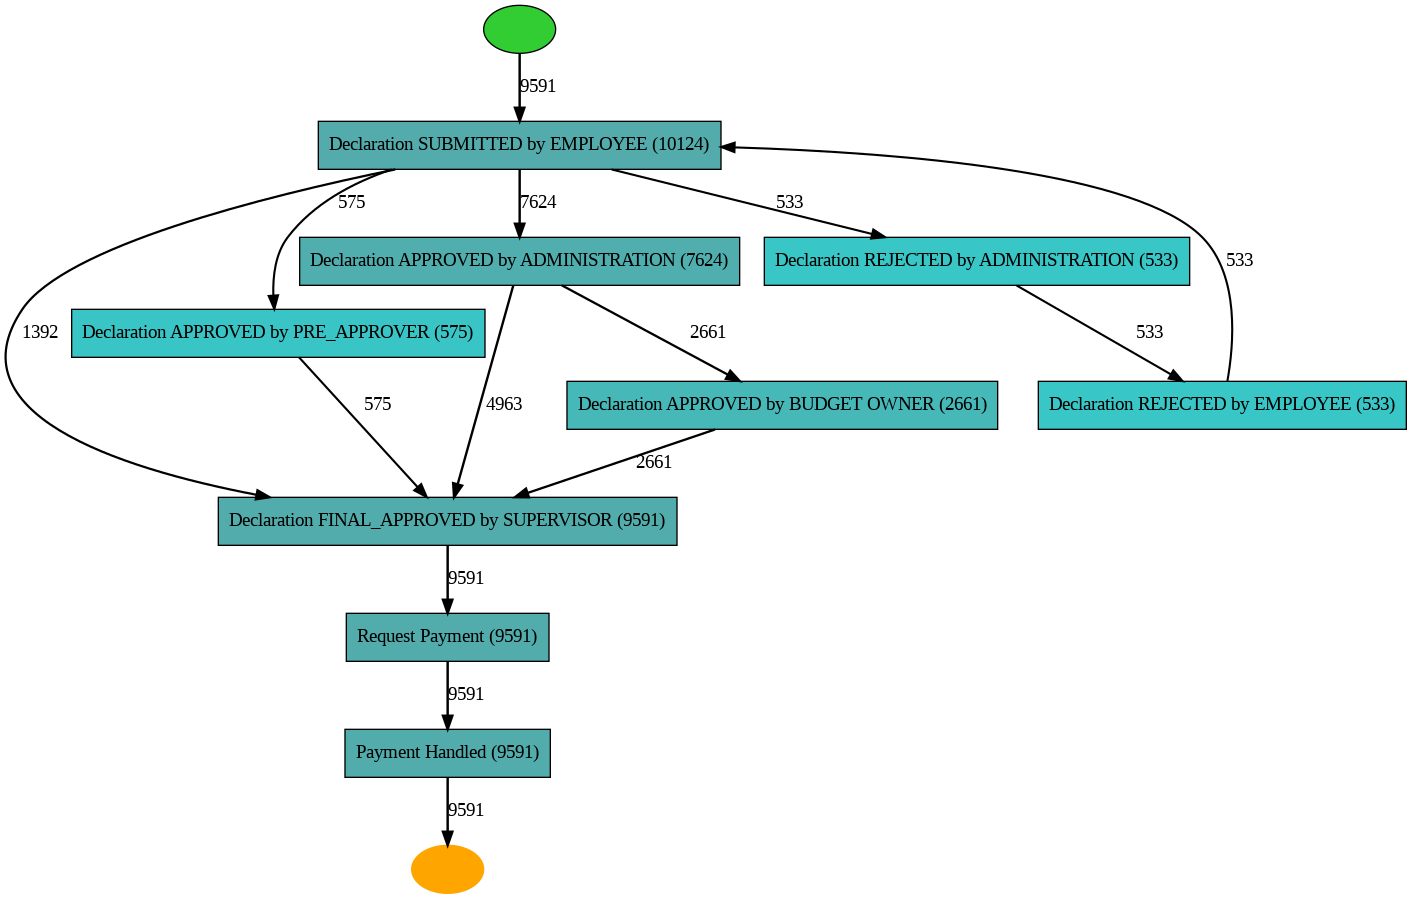

In [87]:

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net = heuristics_miner.apply_heu(domestic_declarations_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

<ipython-input-88-f6e9f477cb93>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=domestic_declarations_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

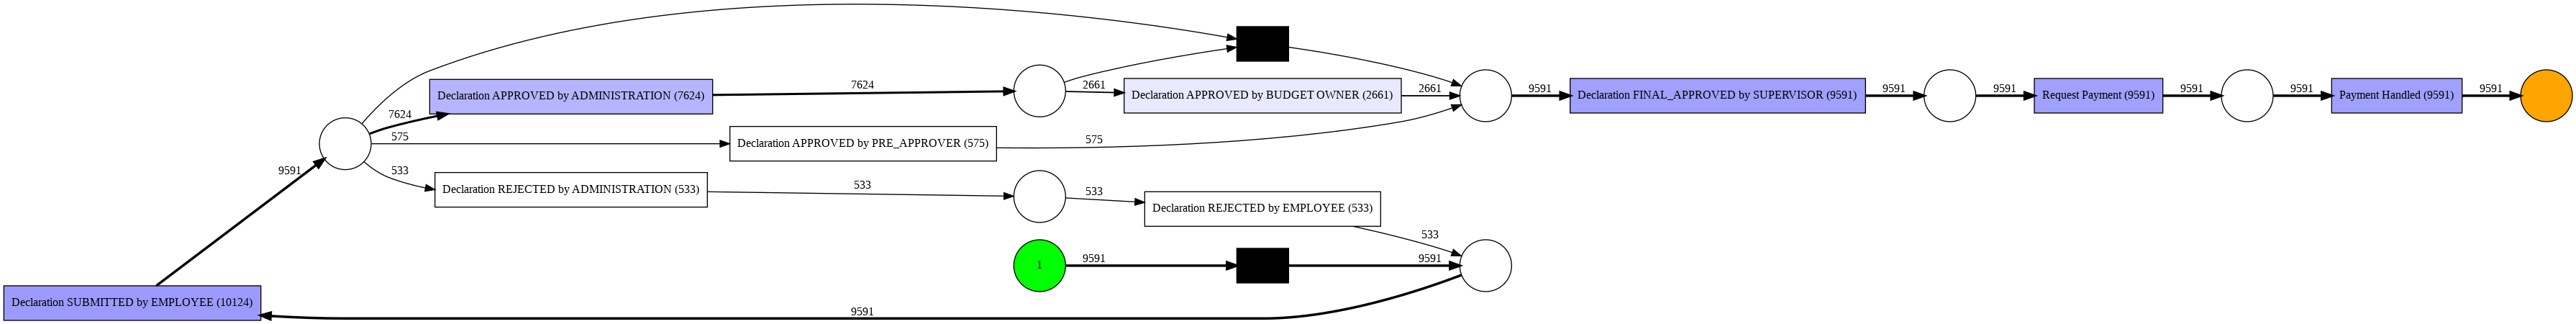

In [88]:

net, initial_marking, final_marking = heuristics_miner.apply(domestic_declarations_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=domestic_declarations_log_f)
pn_visualizer.view(gviz)

In [89]:

fitness_heu = replay_fitness_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec_heu = precision_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
gen_heu = generalization_evaluator.apply(domestic_declarations_log_f, net, initial_marking, final_marking)
simp_heu = simplicity_evaluator.apply(net)

print(fitness_heu)
print(prec_heu)
print(gen_heu)
print(simp_heu)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/21 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 33.73996455009905, 'average_trace_fitness': 0.9034288097472241, 'log_fitness': 0.9092207699450039, 'percentage_of_fitting_traces': 33.73996455009905}
0.9817343774095715
0.8900042462230228
0.7692307692307694


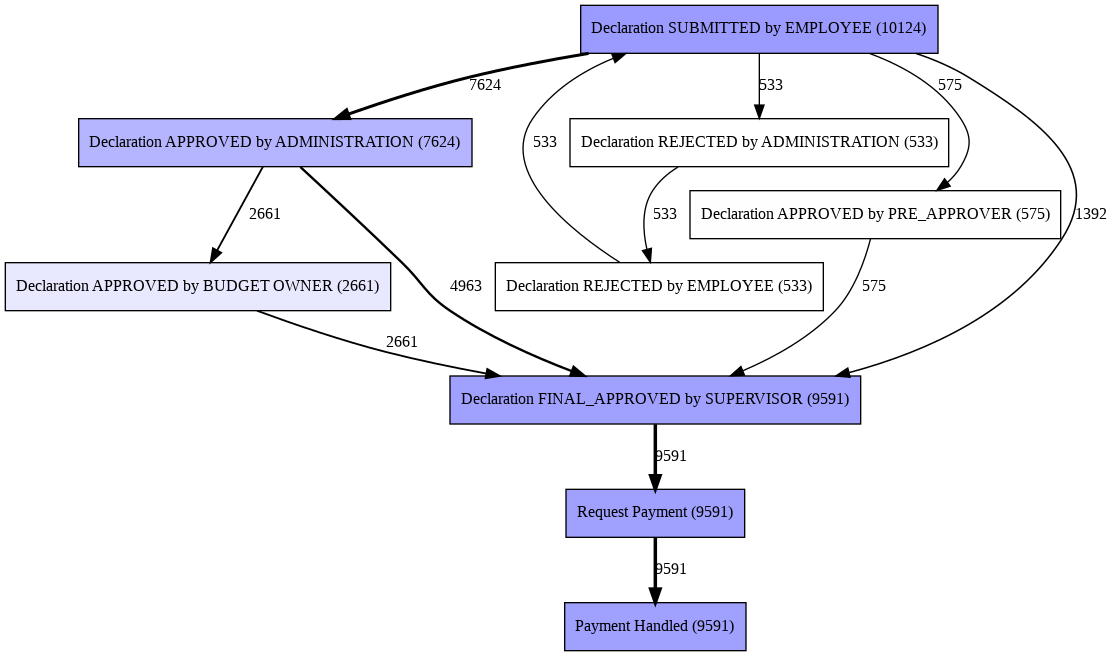

In [92]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
dfg = dfg_discovery.apply(domestic_declarations_log_f)
gviz = dfg_visualization.apply(dfg, log=domestic_declarations_log_f, variant=dfg_visualization.Variants.FREQUENCY, parameters={dfg_visualization.Variants.FREQUENCY.value.Parameters.MAX_NO_EDGES_IN_DIAGRAM:15})
dfg_visualization.view(gviz)

In [91]:

# Conformance Cheking
# Token-based replay matches a trace and a Petri net model,
# Alignment-based replay aims to find one of the best alignment between the trace and the model.

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

# Token-based replay matches a trace and a Petri net model,

replayed_traces = token_replay.apply(domestic_declarations_log, net, initial_marking, final_marking)


print("REPLAY")
print("Number of traces", len(replayed_traces))
#print(replayed_traces)

#print("Case", idl[0].attributes['concept:name'])

anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(domestic_declarations_log[i].attributes["concept:name"])
	i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')

# Alignment-based replay aims to find one of the best alignment between the trace and the model.

aligned_traces = alignments.apply_log(domestic_declarations_log, net, initial_marking, final_marking)
print("ALIGNMENTS")
print("Number of traces", len(aligned_traces))

#print(aligned_traces)

anomalous_traces = []
i = 0
while i < len(aligned_traces):
	if aligned_traces[i]["fitness"] != 1:
		anomalous_traces.append(domestic_declarations_log[i].attributes["concept:name"])
		#anomalous_traces.append(aligned_traces[i]['alignment'])
	i += 1
# print the list as a string
#print(', '.join(map(str, anomalous_traces)))
print(anomalous_traces)
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(aligned_traces))*100 , '%')
     

replaying log with TBR, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

REPLAY
Number of traces 10500
declaration 86791, declaration 86731, declaration 86735, declaration 86805, declaration 86809, declaration 86816, declaration 86716, declaration 86720, declaration 86820, declaration 86824, declaration 86828, declaration 86739, declaration 86746, declaration 86750, declaration 86752, declaration 86756, declaration 86832, declaration 86836, declaration 86760, declaration 86764, declaration 86840, declaration 86776, declaration 86783, declaration 86847, declaration 86851, declaration 86572, declaration 86576, declaration 86855, declaration 86859, declaration 86863, declaration 86867, declaration 86871, declaration 86580, declaration 86584, declaration 86588, declaration 86592, declaration 86880, declaration 86884, declaration 86888, declaration 86596, declaration 86600, declaration 86604, declaration 86702, declaration 86708, declaration 86620, declaration 86632, declaration 86646, declaration 86650, declaration 86654, declaration 86658, declaration 86662, d

aligning log, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

ALIGNMENTS
Number of traces 10500
['declaration 86791', 'declaration 86731', 'declaration 86735', 'declaration 86805', 'declaration 86809', 'declaration 86816', 'declaration 86716', 'declaration 86720', 'declaration 86820', 'declaration 86824', 'declaration 86828', 'declaration 86739', 'declaration 86746', 'declaration 86750', 'declaration 86752', 'declaration 86756', 'declaration 86832', 'declaration 86836', 'declaration 86760', 'declaration 86764', 'declaration 86840', 'declaration 86776', 'declaration 86783', 'declaration 86847', 'declaration 86851', 'declaration 86572', 'declaration 86576', 'declaration 86855', 'declaration 86859', 'declaration 86863', 'declaration 86867', 'declaration 86871', 'declaration 86580', 'declaration 86584', 'declaration 86588', 'declaration 86592', 'declaration 86880', 'declaration 86884', 'declaration 86888', 'declaration 86596', 'declaration 86600', 'declaration 86604', 'declaration 86702', 'declaration 86708', 'declaration 86620', 'declaration 86632',